# Step By Step Pengerjaan (Deadline 3 September 2024)
- Cocokin data byPlaceData.csv dengan scrapetable_wisata.xlsx
- Mengubah konten menjadi bahasa indonesia, dengan mengambil data dari byPlaceData.csv
- Data yang tidak ada di scrapetable_wisata.xlsx langsung di drop saja di byPlaceData.csv (mengurangi storage)

# Data Gathering

In [94]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

DATA = 'data/'

dataBaruPath = f'{DATA}scrapetable_wisata.xlsx'
dataByPlace = f'{DATA}byPlaceData.csv'
dataFiltered = f'{DATA}filtered_byPlaceData.csv'
dataNewFix = f'{DATA}new_fixedData.xlsx'

dfNew = pd.read_excel(dataBaruPath)
dfByPlace = pd.read_csv(dataByPlace)
dfFiltered = pd.read_csv(dataFiltered)
dfNewFix = pd.read_excel(dataNewFix)

In [95]:
dfNew.shape[0]

608

In [96]:
dfNew.head()

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Sunday,Monday,Tuesday,Wednesday,Thursday,city,verified,state,validasi di jogja dan tetangga,Hidden_gem
0,0x2e7a5d33a5d8f47d:0xe34419734ac3afc7,6.281915e+12,Wisata Kali Pelangi,"Wisata Kali Pelangi, Pobayan, Kranggan, Manisr...",-7.694183,110.486006,64.0,4.4,Asia/Jakarta,NaN,...,7 AM–11 PM,7 AM–11 PM,7 AM–11 PM,7 AM–11 PM,7 AM–11 PM,"Klaten Regency, Central Java, Indonesia",True,Open ⋅ Closes 11 PM,YA,1
1,0x2e7a5df313462acd:0x1913d8cdf41f83e6,NaN,Obyek Wisata BKK kendal sari,"9FCR+99R Obyek Wisata BKK kendal sari, Unnamed...",-7.629011,110.490877,28.0,4.3,Asia/Jakarta,NaN,...,NaN,NaN,NaN,NaN,NaN,"Klaten Regency, Central Java, Indonesia",False,NaN,YA,1
2,0x2e7b01c7c0bc9f83:0xeb7a328ebb940844,NaN,Pantai Parangkusumo,"Pantai Parangkusumo, Parang kusumo, Pantai, Pa...",-8.023053,110.325250,1285.0,4.6,Asia/Jakarta,NaN,...,NaN,NaN,NaN,NaN,NaN,"Bantul Regency, Jawa Tengah, Indonesia",True,NaN,YA,1
3,0x2e7a8cf009a7d697:0xdd34334744dc3cb,6.229379e+10,Borobudur Temple,"Borobudur Temple, Jl. Badrawati, Kw. Candi Bor...",-7.607874,110.203751,94732.0,4.7,Asia/Jakarta,http://borobudurpark.com/temple/borobudur/,...,6:30 AM–4:30 PM,6:30 AM–4:30 PM,6:30 AM–4:30 PM,6:30 AM–4:30 PM,6:30 AM–4:30 PM,"Magelang Regency, Central Java, Indonesia",True,Open ⋅ Closes 4:30 PM,YA,1
4,0x2e7a9be3a62bbdaf:0x3a246be0b4291afa,6.287706e+11,Wisata Negeri Sayur Sukomakmur (Terasering Sit...,Wisata Negeri Sayur Sukomakmur (Terasering Sit...,-7.417720,110.064824,1096.0,4.7,Asia/Jakarta,NaN,...,4:30 AM–5 PM,4:30 AM–5 PM,4:30 AM–5 PM,4:30 AM–5 PM,4:30 AM–5 PM,"Magelang Regency, Central Java, Indonesia",True,Open ⋅ Closes 5 PM,YA,1


In [97]:
dfByPlace.head()

,Unnamed: 0,name,address,coordinates,workday_timing,closed_on,reviews,rating,most_popular_times,popular_times,reviewer_name,rating_review,review_text,published_at_date,accessibility_enabled,planning_enabled,children_enabled,is_rating_updated,is_reviews_updated
0,0,( Alun Alun Utara),"59W8+F66 ( Alun Alun Utara), Jl. Alun-Alun Ut...","-7.8038427,110.3655155",Buka 24 jam,Open All Days,43928,4.8,Not Present,Not Present,"['fandy achmad hamid', 'Lucky Zacky']","[4.0, 5.0]",['Tempat Nongkrong yang enak dikunjungi bareng...,"['2023-07-03 18:57:13.071', '2023-11-07 08:23:...","Pintu masuk khusus pengguna kursi roda, Tempat...",Tidak menerima reservasi,Cocok untuk anak-anak,1.0,1.0
1,1,Embung Kladuan UII,"Embung Kladuan UII, Moh. Hatta, Lodadi, Umbul...","-7.6889138,110.4159846",Buka 24 jam,Open All Days,5101,4.7,"08.00, 09.00, 11.00\n---\nTime Label: 08.00\nA...",Monday:\n 04.00: 50% | Biasanya tidak terla...,"['Rizky D. Novyantika', 'Rahajeng Anindyajati'...","[4.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0]","['Embung ini sebenernya lumayan buat nyore, ta...","['2022-10-05 10:41:56.075', '2022-01-01 10:55:...","Pintu masuk khusus pengguna kursi roda, Tempat...",Tidak menerima reservasi,Cocok untuk anak-anak,1.0,1.0
2,2,Jembatan bok bang,"6PH9+4W8 Jembatan bok bang, Unnamed Road, Are...","-7.7722092,110.7198427",Buka 24 jam,Open All Days,17765,4.6,"23.00, 22.00, 00.00\n---\nTime Label: 23.00\nA...",Monday:\n 04.00: 0% | Idle\n 05.00: 0% |...,['Boneka Mainan'],[5.0],"['Saat saya memancing, saya sangat senang. Pa...",['2021-02-19 11:02:46.654'],Tempat parkir khusus pengguna kursi roda,Tidak menerima reservasi,Tidak cocok untuk anak-anak,1.0,1.0
3,3,Sendang Sari Mulyo,"2CMC+GCH Sendang Sari Mulyo, Unnamed Road, No...","-7.9661915,110.4211151",08.00-16.00,Open All Days,12,4.9,Not Present,Not Present,"['Muhammad Zaidan Robbani', 'Handika Roma', 'F...","[5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0]",['Ada sentra pembuatan bawang goreng jugaaa lo...,"['2021-07-03 05:39:15.538', '2022-11-02 02:04:...","Pintu masuk khusus pengguna kursi roda, Tempat...",Tidak menerima reservasi,Cocok untuk anak-anak,0.0,0.0
4,4,Stupa Buddha Dawangsari,"6FGX+926 Stupa Buddha Dawangsari, Dawang Sari...","-7.7740887999999995,110.4975261",08.00-16.00,Open All Days,16,4.9,Not Present,Not Present,"['Keperluan Penelitian', 'Dini Suryaningsih', ...","[5.0, 4.0, 3.0, 4.0, 4.0, 4.0, 5.0, 5.0]",['Candi Dawangsari merupakan peninggalan Stupa...,"['2023-10-29 00:06:11.689', '2023-05-24 12:39:...",Tempat parkir khusus pengguna kursi roda,Tidak menerima reservasi,Tidak cocok untuk anak-anak,1.0,1.0


# Data Assessing

## Cek Info DF

In [98]:
# ByPlace
print('By Place')
print(dfByPlace.info())

print()

# new
print('New')
print(dfNew.info())

print()

# newfixed
print('New Fixed')
print(dfNewFix.info())

By Place
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13992 entries, 0 to 13991
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             13992 non-null  int64  
 1   name                   13992 non-null  object 
 2   address                13992 non-null  object 
 3   coordinates            13992 non-null  object 
 4   workday_timing         13992 non-null  object 
 5   closed_on              13992 non-null  object 
 6   reviews                13992 non-null  int64  
 7   rating                 13992 non-null  float64
 8   most_popular_times     13992 non-null  object 
 9   popular_times          13992 non-null  object 
 10  reviewer_name          13992 non-null  object 
 11  rating_review          13992 non-null  object 
 12  review_text            13992 non-null  object 
 13  published_at_date      13992 non-null  object 
 14  accessibility_enabled  13992 non-null  object

## Cek Nilai Null

In [99]:
# ByPlace
print('By Place')
print(dfByPlace.isna().sum())

print()

# new
print('New')
print(dfNew.isna().sum())

print()

# newfixed
print('New Fixed')
print(dfNewFix.isna().sum())

By Place
Unnamed: 0                   0
name                         0
address                      0
coordinates                  0
workday_timing               0
closed_on                    0
reviews                      0
rating                       0
most_popular_times           0
popular_times                0
reviewer_name                0
rating_review                0
review_text                  0
published_at_date            0
accessibility_enabled        0
planning_enabled             0
children_enabled             0
is_rating_updated        13881
is_reviews_updated       13881
dtype: int64

New
business_id                         0
phone_number                      308
name                                0
full_address                        0
latitude                            0
longitude                           0
review_count                       84
rating                             84
timezone                            0
website                           461
plac

## Cek Nilai Duplikat

In [100]:
# ByPlace
print('By Place')
print(dfByPlace.duplicated().sum())

print()

# new
print('New')
print(dfNew.duplicated().sum())

print()

# newfixed
print('New Fixed')
print(dfNewFix.duplicated().sum())

By Place
0

New
0

New Fixed
0


## Pemilihan Kolom Data Bu Melany

In [101]:
dfNew.head()

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Sunday,Monday,Tuesday,Wednesday,Thursday,city,verified,state,validasi di jogja dan tetangga,Hidden_gem
0,0x2e7a5d33a5d8f47d:0xe34419734ac3afc7,6.281915e+12,Wisata Kali Pelangi,"Wisata Kali Pelangi, Pobayan, Kranggan, Manisr...",-7.694183,110.486006,64.0,4.4,Asia/Jakarta,NaN,...,7 AM–11 PM,7 AM–11 PM,7 AM–11 PM,7 AM–11 PM,7 AM–11 PM,"Klaten Regency, Central Java, Indonesia",True,Open ⋅ Closes 11 PM,YA,1
1,0x2e7a5df313462acd:0x1913d8cdf41f83e6,NaN,Obyek Wisata BKK kendal sari,"9FCR+99R Obyek Wisata BKK kendal sari, Unnamed...",-7.629011,110.490877,28.0,4.3,Asia/Jakarta,NaN,...,NaN,NaN,NaN,NaN,NaN,"Klaten Regency, Central Java, Indonesia",False,NaN,YA,1
2,0x2e7b01c7c0bc9f83:0xeb7a328ebb940844,NaN,Pantai Parangkusumo,"Pantai Parangkusumo, Parang kusumo, Pantai, Pa...",-8.023053,110.325250,1285.0,4.6,Asia/Jakarta,NaN,...,NaN,NaN,NaN,NaN,NaN,"Bantul Regency, Jawa Tengah, Indonesia",True,NaN,YA,1
3,0x2e7a8cf009a7d697:0xdd34334744dc3cb,6.229379e+10,Borobudur Temple,"Borobudur Temple, Jl. Badrawati, Kw. Candi Bor...",-7.607874,110.203751,94732.0,4.7,Asia/Jakarta,http://borobudurpark.com/temple/borobudur/,...,6:30 AM–4:30 PM,6:30 AM–4:30 PM,6:30 AM–4:30 PM,6:30 AM–4:30 PM,6:30 AM–4:30 PM,"Magelang Regency, Central Java, Indonesia",True,Open ⋅ Closes 4:30 PM,YA,1
4,0x2e7a9be3a62bbdaf:0x3a246be0b4291afa,6.287706e+11,Wisata Negeri Sayur Sukomakmur (Terasering Sit...,Wisata Negeri Sayur Sukomakmur (Terasering Sit...,-7.417720,110.064824,1096.0,4.7,Asia/Jakarta,NaN,...,4:30 AM–5 PM,4:30 AM–5 PM,4:30 AM–5 PM,4:30 AM–5 PM,4:30 AM–5 PM,"Magelang Regency, Central Java, Indonesia",True,Open ⋅ Closes 5 PM,YA,1


In [102]:
print(dfNew.latitude.sample(1))
print(dfNew.longitude.sample(1))

print(dfByPlace.coordinates.sample(1))
print(dfByPlace.address.sample(1).values)

560   -7.896636
Name: latitude, dtype: float64
448    110.221059
Name: longitude, dtype: float64
3423    -6.3963844,106.86901669999999
Name: coordinates, dtype: object
['Taman Jati Indah, Jl. AKBP Agil Kusumadya No.160, Jatimakmur, Jati Wetan, Kec. Jati, Kabupaten Kudus, Jawa Tengah 59346']


In [103]:
print(dfNew.timezone.unique())
print(dfNew.review_count.sample(1))
print(dfNew.place_id.sample(1))
print(dfNew.city.unique())
print(dfNew['validasi di jogja dan tetangga'].unique())

['Asia/Jakarta']
426    285.0
Name: review_count, dtype: float64
528    ChIJuchFcePvei4RCV4k3maV9c8
Name: place_id, dtype: object
['Klaten Regency, Central Java, Indonesia'
 'Bantul Regency, Jawa Tengah, Indonesia'
 'Magelang Regency, Central Java, Indonesia'
 'Magelang City, Central Java, Indonesia'
 'Yogyakarta City, Special Region of Yogyakarta, Indonesia'
 'Bantul Regency, Special Region of Yogyakarta, Indonesia'
 'Sleman Regency, Special Region of Yogyakarta, Indonesia'
 'Kulon Progo Regency, Special Region of Yogyakarta, Indonesia'
 'Gunung Kidul Regency, Special Region of Yogyakarta, Indonesia'
 'Yogyakarta, Special Region of Yogyakarta, Indonesia'
 'yogyakarta, Special Region of Yogyakarta, Indonesia'
 'Purworejo Regency, Central Java, Indonesia']
['YA']


# Data Cleaning

In [104]:
# Dataset 1: Menghapus kolom dengan banyak missing values
dfByPlace_cleaned = dfByPlace.drop(columns=['is_rating_updated', 'is_reviews_updated'])

# Dataset 2: Menghapus kolom dengan banyak missing values dan mengisi missing values lainnya
dfNew_cleaned = dfNew.drop(columns=['price_level'])

# Mengisi missing values pada kolom numerik dengan median
dfNew_cleaned['phone_number'].fillna('Unknown', inplace=True)
# dfNew_cleaned['review_count'].fillna(dfNew_cleaned['review_count'].median(), inplace=True) (Dipertimbangkan)
dfNew_cleaned['rating'].fillna(dfNew_cleaned['rating'].median(), inplace=True)

# Mengisi missing values pada kolom string dengan 'Unknown'
dfNew_cleaned['website'].fillna('Unknown', inplace=True)
columns_to_fill = ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'state']
for column in columns_to_fill:
    dfNew_cleaned[column].fillna('Unknown', inplace=True)

# Memeriksa kembali missing values setelah pembersihan
missing_values_dfByPlace_cleaned = dfByPlace_cleaned.isnull().sum()
missing_values_dfNew_cleaned = dfNew_cleaned.isnull().sum()

missing_values_dfByPlace_cleaned, missing_values_dfNew_cleaned

(Unnamed: 0               0
 name                     0
 address                  0
 coordinates              0
 workday_timing           0
 closed_on                0
 reviews                  0
 rating                   0
 most_popular_times       0
 popular_times            0
 reviewer_name            0
 rating_review            0
 review_text              0
 published_at_date        0
 accessibility_enabled    0
 planning_enabled         0
 children_enabled         0
 dtype: int64,
 business_id                        0
 phone_number                       0
 name                               0
 full_address                       0
 latitude                           0
 longitude                          0
 review_count                      84
 rating                             0
 timezone                           0
 website                            0
 place_id                           0
 place_link                         0
 types                              0
 Friday        

## Menggabungkan Data dan Filtering

In [105]:
# Menggabungkan data dari kedua dataset berdasarkan kolom address
# Menentukan keyword untuk filtering
keywords = ["Jawa Tengah", "Central Java", "Yogyakarta", "Special Region of Yogyakarta"]

# Filter Dataset 1
filtered_dfByPlace = dfByPlace_cleaned[dfByPlace_cleaned['address'].str.contains('|'.join(keywords), case=False, na=False)]

# Filter Dataset 2
filtered_dfNew = dfNew_cleaned[dfNew_cleaned['full_address'].str.contains('|'.join(keywords), case=False, na=False)]

# Menggabungkan kedua dataset yang telah difilter
combined_dataset = pd.concat([filtered_dfByPlace, filtered_dfNew], ignore_index=True)

# Menampilkan jumlah baris dan kolom dari dataset yang digabungkan
combined_shape = combined_dataset.shape
combined_shape

(3902, 40)

## Filtering Data

In [106]:
# Convert the names in both datasets to lowercase for better matching
# dfByPlace['name'] = dfByPlace['name'].str.lower()
# dfNew['name'] = dfNew['name']

# Filter out rows in byPlaceData that do not have a matching name in scrapetable_wisata
filtered_data = dfByPlace[(dfByPlace['name'].str.lower()).isin((dfNew['name']).str.lower())]

# Now filter based on the address containing 'Jawa Tengah', 'Central Java', or 'Yogyakarta'
filtered_data = filtered_data[
    filtered_data['address'].str.contains('Jawa Tengah|Central Java|Yogyakarta', case=False)
]

# Display the first few rows of the filtered data to verify
filtered_data.head()

,Unnamed: 0,name,address,coordinates,workday_timing,closed_on,reviews,rating,most_popular_times,popular_times,reviewer_name,rating_review,review_text,published_at_date,accessibility_enabled,planning_enabled,children_enabled,is_rating_updated,is_reviews_updated
132,132,Agro Tainment Wisata Kampung Markisa,"Agro Tainment Wisata Kampung Markisa, Blunyahr...","-7.774189,110.3647986",07.00-21.00,Open All Days,2,5.0,"07.00, 08.00, 09.00\n---\nTime Label: 07.00\nA...",Monday:\n 06.00: 0% | Idle\n 07.00: 25% ...,"['Deyze Nghokeh', 'Khoari Koutsar', 'Deyze Ngh...","[5.0, 5.0, 5.0, 5.0]","['Teks review tidak tersedia', 'Teks review ti...","['2023-09-20 07:51:04.205', '2020-09-16 04:26:...","Pintu masuk khusus pengguna kursi roda, Tempat...",Tidak menerima reservasi,Cocok untuk anak-anak,NaN,NaN
773,773,Ancol Wisata Alam,"Ancol Wisata Alam, Unnamed Road, Selingan, Kar...","-7.6668655999999995,110.266713",08.00-17.00,Open All Days,390,4.4,Not Present,Not Present,"['Ifandri Dwi Aryono (IFANDRI DWI ARYONO)', 'C...","[5.0, 5.0, 4.0, 5.0, 4.0, 2.0, 5.0, 4.0]",['salah catu calon destinasi wisata alam berik...,"['2023-05-29 15:07:33.300', '2023-11-25 02:29:...","Pintu masuk khusus pengguna kursi roda, Tempat...",Tidak menerima reservasi,Cocok untuk anak-anak,NaN,NaN
905,905,BANYU WIYOSO DAGEN (Kolam Ikan),"4846+WH5 BANYU WIYOSO DAGEN (Kolam Ikan), Gumu...","-7.8927344999999995,110.3114727",08.00-17.00,Open All Days,4,5.0,Not Present,Not Present,"['Laili Isna Fatkhurrahmah', 'Dian Kusuma Dewi...","[5.0, 5.0, 5.0, 5.0]",['Tempat yang asik buat jalan2 pagi atau sore....,"['2021-02-09 10:13:38.853', '2023-03-29 03:37:...","Pintu masuk khusus pengguna kursi roda, Tempat...",Tidak menerima reservasi,Cocok untuk anak-anak,NaN,NaN
1260,1260,Bendhung Lepen,"Bendhung Lepen, Mrican UH7/ 338, Giwangan, Kec...","-7.8316668,110.3945119",05.30-22.00,Open All Days,1336,4.7,"17.00, 16.00, 18.00\n---\nTime Label: 17.00\nA...",Monday:\n 04.00: 0% | Idle\n 05.00: 6% |...,"['Muhammad Hidayatullah', 'suwarso doang', 'L ...","[5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0]","['tempat menyenangkan untuk rekreasi, bisa dud...","['2023-11-15 07:57:08.882', '2023-07-26 18:47:...","Pintu masuk khusus pengguna kursi roda, Tempat...",Tidak menerima reservasi,"Cocok untuk anak-anak, Cocok untuk ulang tahun...",NaN,NaN
1291,1291,Bendungan Irigasi Jalan Samas,"278H+G39 Bendungan Irigasi Jalan Samas, Unname...","-7.9837082,110.2777382",Buka 24 jam,Open All Days,1,5.0,Not Present,Not Present,['Bastian Viery'],[5.0],['Bagus'],['2021-04-28 09:04:42.198'],Tempat parkir khusus pengguna kursi roda,Tidak menerima reservasi,Tidak cocok untuk anak-anak,NaN,NaN


In [107]:
# Save the filtered data to a new CSV file
filtered_data_path = 'data/filtered_byPlaceData.csv'
filtered_data.to_csv(filtered_data_path, index=False)

filtered_data.head()

,Unnamed: 0,name,address,coordinates,workday_timing,closed_on,reviews,rating,most_popular_times,popular_times,reviewer_name,rating_review,review_text,published_at_date,accessibility_enabled,planning_enabled,children_enabled,is_rating_updated,is_reviews_updated
132,132,Agro Tainment Wisata Kampung Markisa,"Agro Tainment Wisata Kampung Markisa, Blunyahr...","-7.774189,110.3647986",07.00-21.00,Open All Days,2,5.0,"07.00, 08.00, 09.00\n---\nTime Label: 07.00\nA...",Monday:\n 06.00: 0% | Idle\n 07.00: 25% ...,"['Deyze Nghokeh', 'Khoari Koutsar', 'Deyze Ngh...","[5.0, 5.0, 5.0, 5.0]","['Teks review tidak tersedia', 'Teks review ti...","['2023-09-20 07:51:04.205', '2020-09-16 04:26:...","Pintu masuk khusus pengguna kursi roda, Tempat...",Tidak menerima reservasi,Cocok untuk anak-anak,NaN,NaN
773,773,Ancol Wisata Alam,"Ancol Wisata Alam, Unnamed Road, Selingan, Kar...","-7.6668655999999995,110.266713",08.00-17.00,Open All Days,390,4.4,Not Present,Not Present,"['Ifandri Dwi Aryono (IFANDRI DWI ARYONO)', 'C...","[5.0, 5.0, 4.0, 5.0, 4.0, 2.0, 5.0, 4.0]",['salah catu calon destinasi wisata alam berik...,"['2023-05-29 15:07:33.300', '2023-11-25 02:29:...","Pintu masuk khusus pengguna kursi roda, Tempat...",Tidak menerima reservasi,Cocok untuk anak-anak,NaN,NaN
905,905,BANYU WIYOSO DAGEN (Kolam Ikan),"4846+WH5 BANYU WIYOSO DAGEN (Kolam Ikan), Gumu...","-7.8927344999999995,110.3114727",08.00-17.00,Open All Days,4,5.0,Not Present,Not Present,"['Laili Isna Fatkhurrahmah', 'Dian Kusuma Dewi...","[5.0, 5.0, 5.0, 5.0]",['Tempat yang asik buat jalan2 pagi atau sore....,"['2021-02-09 10:13:38.853', '2023-03-29 03:37:...","Pintu masuk khusus pengguna kursi roda, Tempat...",Tidak menerima reservasi,Cocok untuk anak-anak,NaN,NaN
1260,1260,Bendhung Lepen,"Bendhung Lepen, Mrican UH7/ 338, Giwangan, Kec...","-7.8316668,110.3945119",05.30-22.00,Open All Days,1336,4.7,"17.00, 16.00, 18.00\n---\nTime Label: 17.00\nA...",Monday:\n 04.00: 0% | Idle\n 05.00: 6% |...,"['Muhammad Hidayatullah', 'suwarso doang', 'L ...","[5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0]","['tempat menyenangkan untuk rekreasi, bisa dud...","['2023-11-15 07:57:08.882', '2023-07-26 18:47:...","Pintu masuk khusus pengguna kursi roda, Tempat...",Tidak menerima reservasi,"Cocok untuk anak-anak, Cocok untuk ulang tahun...",NaN,NaN
1291,1291,Bendungan Irigasi Jalan Samas,"278H+G39 Bendungan Irigasi Jalan Samas, Unname...","-7.9837082,110.2777382",Buka 24 jam,Open All Days,1,5.0,Not Present,Not Present,['Bastian Viery'],[5.0],['Bagus'],['2021-04-28 09:04:42.198'],Tempat parkir khusus pengguna kursi roda,Tidak menerima reservasi,Tidak cocok untuk anak-anak,NaN,NaN


## Ambil Data dari DF Baru
Pengambilan data yang mungkin masih merupakan wisata dari data baru, tapi tidak ada di data utama

In [108]:
unpickedData = dfNew[~dfNew['name'].str.lower().isin(filtered_data['name'].str.lower())]

filteredCols = filtered_data.columns
unpickedCols = unpickedData.columns

### Get Data Fix

Data yang disini sudah hasil pengambilan dari data baru, yang tidak ada di data lama

In [109]:
fixedDf = pd.read_csv('data/fixed_data.csv')
fixedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0.1                    455 non-null    int64  
 1   Unnamed: 0                      138 non-null    float64
 2   name                            455 non-null    object 
 3   address                         138 non-null    object 
 4   coordinates                     138 non-null    object 
 5   workday_timing                  138 non-null    object 
 6   closed_on                       138 non-null    object 
 7   reviews                         138 non-null    float64
 8   rating                          426 non-null    float64
 9   most_popular_times              138 non-null    object 
 10  popular_times                   138 non-null    object 
 11  reviewer_name                   138 non-null    object 
 12  rating_review                   138 

In [110]:
fixedDf.shape[0]

455

In [111]:
filtered_data.shape[0]

138

### Cek Nilai Null

In [112]:
fixedDf.isna().sum()

Unnamed: 0.1                        0
Unnamed: 0                        317
name                                0
address                           317
coordinates                       317
workday_timing                    317
closed_on                         317
reviews                           317
rating                             29
most_popular_times                317
popular_times                     317
reviewer_name                     317
rating_review                     317
review_text                       317
published_at_date                 317
accessibility_enabled             317
planning_enabled                  317
children_enabled                  317
is_rating_updated                 455
is_reviews_updated                455
business_id                       138
phone_number                      293
full_address                      138
latitude                          138
longitude                         138
review_count                      167
timezone    

## Feature Selection

### Memindahkan Nilai dari Kolom ke Kolom

In [113]:
# Fungsi drop kolom
def dropCol(df, lsCol):
    col1 = lsCol[0]
    col2 = lsCol[1]
    
    if col1 == 'latitude' and col2 == 'longitude':
        df.drop(columns=[col1, col2], inplace=True)
    else:
        df.drop(columns=[col2], inplace=True)
    
    return df

# Fungsi Pemindah Nilai
def moveValues(col1, col2, df):
    # Kondisi coordinates
    if col1 == 'latitude' and col2 == 'longitude':
        # Menggabungkan koordinat dan menyimpannya pada kolom 'coordinates'
        df['coordinates'] = df.apply(lambda row: f"{row[col1]},{row[col2]}" if pd.isna(row['coordinates']) else row['coordinates'], axis=1)
        
        # Menghapus kolom latitude dan longitude
        df = dropCol(df, [col1, col2])
    else:
        # Mengecek baris dengan NaN pada col1
        mask_nullCol1 = df[col1].isna()
        
        if mask_nullCol1.any():
            df.loc[mask_nullCol1, col1] = df.loc[mask_nullCol1, col2]
        else:
            print('Data tidak ada isinya')
        
        # Menghapus kolom col1 dan col2
        df = dropCol(df, [col1, col2])
    
    return df

In [114]:
# Kolom Address dan Full Address
fixedDf = moveValues('address', 'full_address', fixedDf)
# Kolom latitude dan longitude
fixedDf = moveValues('latitude', 'longitude', fixedDf)
# Kolom latitude dan longitude
fixedDf = moveValues('reviews', 'review_count', fixedDf)

### Hapus Kolom Sisa yang Tidak Digunakan

In [115]:
delCols = ['is_rating_updated', 'is_reviews_updated', 'website', 
           'business_id', 'phone_number', 'Unnamed: 0.1', 'Unnamed: 0', 'price_level']

fixedDf.drop(columns=delCols, inplace=True)

In [116]:
fixedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            455 non-null    object 
 1   address                         455 non-null    object 
 2   coordinates                     455 non-null    object 
 3   workday_timing                  138 non-null    object 
 4   closed_on                       138 non-null    object 
 5   reviews                         426 non-null    float64
 6   rating                          426 non-null    float64
 7   most_popular_times              138 non-null    object 
 8   popular_times                   138 non-null    object 
 9   reviewer_name                   138 non-null    object 
 10  rating_review                   138 non-null    object 
 11  review_text                     138 non-null    object 
 12  published_at_date               138 

## Menangani Nilai Null

1. timezone (Faishal)
   
Diisi dengan nilai unique, yaitu Asia/Jakarta

In [117]:
fixedDf['timezone'] = fixedDf.timezone.fillna('Asia/Jakarta', axis=0)
print('Nilai unique: ', fixedDf.timezone.unique())

Nilai unique:  ['Asia/Jakarta']


2. types (Akhdan)

Diisi sesuai dengan bidangnya, dilihat dari nilai unique

In [118]:
print('Nilai unique: ', fixedDf.types.unique())
# fixedDf.timezone.fillna('Asia/Jakarta', axis=0, inplace=True)

Nilai unique:  [nan 'Tourist attraction'
 'Tourist attraction, Historical landmark, Place of worship, Buddhist temple'
 'Tourist attraction, Community college, Education center, Shopping mall'
 'Tourist attraction, Business center'
 'Tourist attraction, Camping farm, Scenic spot'
 'Tourist attraction, Historical landmark'
 'Tourist attraction, Recreation center'
 'Tourist attraction, Historical place'
 'Tourist attraction, City park, Park'
 'Tourist attraction, History museum' 'Tourist attraction, Museum'
 'Tourist attraction, Monument' 'Tourist attraction, Mosque'
 'Tourist attraction, Historical landmark, Monument'
 'Tourist attraction, Art gallery' 'Tour agency'
 'Tourist attraction, Fortress, Natural history museum, Photo booth, History museum'
 'Tourist attraction, Garden'
 'Tourist attraction, Market, Traditional market' 'Travel agency'
 'Tourist attraction, Heritage museum'
 'Tourist attraction, Tourist information center'
 'Tourist attraction, Playground, Indoor playground'
 'T

3. city (Faishal)
   
Diisi dengan menggunakan regex dari full address

In [119]:
# Fungsi untuk mengambil dua bagian terakhir setelah dipisahkan oleh koma
def extractCity(df):
    for i, row in df.iterrows():
        address = row['address']
        
        # Periksa apakah kolom 'city' kosong (NaN)
        if pd.isna(row['city']):
            parts = address.split(',')
            # Menggabungkan tiga bagian terakhir
            df.at[i, 'city'] = ','.join(parts[-2:]).strip()
    return df

fixedDf = extractCity(fixedDf)

# Karena removeNumber bekerja dengan Pandas Series, kita perlu menerapkannya pada keseluruhan kolom
fixedDf['city'] = fixedDf['city'].apply(lambda x: pd.Series([x]).str.replace(r'\d+', '', regex=True).item().strip())

In [120]:
# ganti bahasa indonesia
translationDict = {
    'Bantul Regency, Special Region of Yogyakarta': 'Kabupaten Bantul, Daerah Istimewa Yogyakarta',
    'Bantul Regency, Special Region of Yogyakarta, Indonesia': 'Kabupaten Bantul, Daerah Istimewa Yogyakarta',
    'Yogyakarta City, Special Region of Yogyakarta': 'Kota Yogyakarta, Daerah Istimewa Yogyakarta',
    'Sleman Regency, Special Region of Yogyakarta': 'Kabupaten Sleman, Daerah Istimewa Yogyakarta',
    'Magelang Regency, Central Java': 'Kabupaten Magelang, Jawa Tengah',
    'Magelang Regency, Central Java, Indonesia': 'Kabupaten Magelang, Jawa Tengah',
    'Kulon Progo Regency, Special Region of Yogyakarta, Indonesia': 'Kabupaten Kulon Progo, Daerah Istimewa Yogyakarta',
    'yogyakarta, Special Region of Yogyakarta, Indonesia': 'Kota Yogyakarta, Daerah Istimewa Yogyakarta',
    'Yogyakarta City, Special Region of Yogyakarta, Indonesia': 'Kota Yogyakarta, Daerah Istimewa Yogyakarta',
    'Klaten Regency, Central Java, Indonesia': 'Kabupaten Klaten, Jawa Tengah',
    'Sleman Regency, Special Region of Yogyakarta': 'Kabupaten Sleman, Daerah Istimewa Yogyakarta',
    'Sleman Regency, Special Region of Yogyakarta, Indonesia': 'Kabupaten Sleman, Daerah Istimewa Yogyakarta',
    'Bantul Regency, Jawa Tengah, Indonesia': 'Kabupaten Bantul, Daerah Istimewa Yogyakarta',
    'Gunung Kidul Regency, Special Region of Yogyakarta, Indonesia': 'Kabupaten Gunung Kidul, Daerah istimewa Yogyakarta',
    'Purworejo Regency, Central Java, Indonesia': 'Kabupaten Purworejo, Jawa Tengah'
}

# Fungsi untuk melakukan translasi berdasarkan dictionary
def translate_city(city):
    return translationDict.get(city, city)

# Apply fungsi translasi ke kolom city
fixedDf['city'] = fixedDf['city'].apply(translate_city)

In [121]:
fixedDf.city.unique()

array(['Kota Yogyakarta, Daerah Istimewa Yogyakarta',
       'Kabupaten Magelang, Jawa Tengah',
       'Kabupaten Bantul, Daerah Istimewa Yogyakarta',
       'Kabupaten Sleman, Daerah Istimewa Yogyakarta',
       'Yogyakarta, Daerah Istimewa Yogyakarta',
       'Kabupaten Cilacap, Jawa Tengah', 'Kota Magelang, Jawa Tengah',
       'Kabupaten Kulon Progo, Daerah Istimewa Yogyakarta',
       'Kabupaten Klaten, Jawa Tengah',
       'Kabupaten Gunung Kidul, Daerah istimewa Yogyakarta',
       'Kabupaten Purworejo, Jawa Tengah'], dtype=object)

4. workday_timing dan closed_on (Faishal)

Ambil dari yang hari-hari

In [122]:
# Workday Timing
def fillWorkdayTime(df, lsDays):
    for i, row in df.iterrows():
        tempTime = []
        
        for col in lsDays:
            if not pd.isna(row[col]):
                tempTime.append(row[col])
                
        if len(tempTime) > 0:
            # Menghitung frekuensi kemunculan dan mengambil yang paling sering
            most_common_time = Counter(tempTime).most_common(1)[0][0]
            df.at[i, 'workday_timing'] = most_common_time
            
    return df

# Closed On
# Fungsi untuk mengisi hari-hari yang "Closed On"
def fillClosedOn(df, lsDays, day_translation):
    # Urutan hari dari Senin sampai Minggu
    order_days = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
    
    for i, row in df.iterrows():
        tempWord = row['closed_on']  # Mulai dengan nilai existing di kolom 'closed_on'
        
        # Jika closed_on sudah ada isinya, lewati baris ini
        if tempWord and not pd.isna(tempWord):
            continue
        
        closed_days = []  # List untuk menyimpan hari-hari yang tutup berdasarkan lsDays
        all_nan = True    # Flag untuk mengecek apakah semua kolom lsDays adalah NaN
        
        # Iterasi melalui hari-hari dalam lsDays
        for col in lsDays:
            if pd.isna(row[col]):
                closed_days.append(day_translation[col])  # Catat hari yang tutup
            else:
                all_nan = False  # Jika ada yang bukan NaN, berarti tidak semua hari tutup

        # Jika semua kolom hari adalah NaN, isi 'Open All Days'
        if all_nan:
            tempWord = 'Open All Days'
        else:
            if closed_days:  # Jika ada hari yang tutup
                tempWord = ', '.join(closed_days)
                # Menghilangkan hari yang berulang dan mengurutkan
                unique_days = sorted(set(tempWord.split(', ')), key=order_days.index)
                tempWord = ', '.join(unique_days)
        
        # Simpan hasil akhir
        df.at[i, 'closed_on'] = tempWord
    
    return df

In [123]:
# List Days
lsDays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday',
          'Thursday', 'Friday', 'Saturday']
# Dictionary untuk menerjemahkan hari dari bahasa Inggris ke bahasa Indonesia
dayTranslation = {
    'Sunday': 'Minggu',
    'Monday': 'Senin',
    'Tuesday': 'Selasa',
    'Wednesday': 'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu'
}

# Panggil fungsi fillWorkdayTime
fixedDf = fillWorkdayTime(fixedDf, lsDays=lsDays)
# Panggil fungsi fillClosedOn
fixedDf = fillClosedOn(fixedDf, lsDays, dayTranslation)

In [124]:
# Drop Kolom-kolom Hari
fixedDf = fixedDf.drop(lsDays, axis=1)

5. reviews dan rating (Akhdan)
   
Manual aja ambil dari maps, kalau memungkinkan

In [130]:
# Ambil data dari isian manual
manualDf = pd.read_excel(f'{DATA}new_fixedData.xlsx')

# Merge the datasets on the 'name' column
merged_df = pd.merge(fixedDf, manualDf[['name', 'reviews', 'rating']], on='name', how='left', suffixes=('', '_manual'))

# Update null values in 'reviews' and 'rating' columns in fixeddf with values from manualdf
merged_df['reviews'] = merged_df['reviews'].combine_first(merged_df['reviews_manual'])
merged_df['rating'] = merged_df['rating'].combine_first(merged_df['rating_manual'])

# Drop the manual columns used for the update
updated_df = merged_df.drop(columns=['reviews_manual', 'rating_manual'])

# Display the first few rows of the updated dataframe
updated_df_head = updated_df.head()
updated_df_head


,name,address,coordinates,workday_timing,closed_on,reviews,rating,most_popular_times,popular_times,reviewer_name,...,children_enabled,timezone,place_id,place_link,types,city,verified,state,validasi di jogja dan tetangga,Hidden_gem
0,Agro Tainment Wisata Kampung Markisa,"Agro Tainment Wisata Kampung Markisa, Blunyahr...","-7.774189,110.3647986",07.00-21.00,Open All Days,2.0,5.0,"07.00, 08.00, 09.00\n---\nTime Label: 07.00\nA...",Monday:\n 06.00: 0% | Idle\n 07.00: 25% ...,"['Deyze Nghokeh', 'Khoari Koutsar', 'Deyze Ngh...",...,Cocok untuk anak-anak,Asia/Jakarta,NaN,NaN,NaN,"Kota Yogyakarta, Daerah Istimewa Yogyakarta",NaN,NaN,YA,NaN
1,Ancol Wisata Alam,"Ancol Wisata Alam, Unnamed Road, Selingan, Kar...","-7.6668655999999995,110.266713",08.00-17.00,Open All Days,390.0,4.4,Not Present,Not Present,"['Ifandri Dwi Aryono (IFANDRI DWI ARYONO)', 'C...",...,Cocok untuk anak-anak,Asia/Jakarta,NaN,NaN,NaN,"Kabupaten Magelang, Jawa Tengah",NaN,NaN,YA,NaN
2,BANYU WIYOSO DAGEN (Kolam Ikan),"4846+WH5 BANYU WIYOSO DAGEN (Kolam Ikan), Gumu...","-7.8927344999999995,110.3114727",08.00-17.00,Open All Days,4.0,5.0,Not Present,Not Present,"['Laili Isna Fatkhurrahmah', 'Dian Kusuma Dewi...",...,Cocok untuk anak-anak,Asia/Jakarta,NaN,NaN,NaN,"Kabupaten Bantul, Daerah Istimewa Yogyakarta",NaN,NaN,YA,NaN
3,Bendhung Lepen,"Bendhung Lepen, Mrican UH7/ 338, Giwangan, Kec...","-7.8316668,110.3945119",05.30-22.00,Open All Days,1336.0,4.7,"17.00, 16.00, 18.00\n---\nTime Label: 17.00\nA...",Monday:\n 04.00: 0% | Idle\n 05.00: 6% |...,"['Muhammad Hidayatullah', 'suwarso doang', 'L ...",...,"Cocok untuk anak-anak, Cocok untuk ulang tahun...",Asia/Jakarta,NaN,NaN,NaN,"Kota Yogyakarta, Daerah Istimewa Yogyakarta",NaN,NaN,YA,NaN
4,Bendungan Irigasi Jalan Samas,"278H+G39 Bendungan Irigasi Jalan Samas, Unname...","-7.9837082,110.2777382",Buka 24 jam,Open All Days,1.0,5.0,Not Present,Not Present,['Bastian Viery'],...,Tidak cocok untuk anak-anak,Asia/Jakarta,NaN,NaN,NaN,"Kabupaten Bantul, Daerah Istimewa Yogyakarta",NaN,NaN,YA,NaN


6. reviewer_name, rating_review, dan review_text (Akhdan)

ambil dari maps juga, masing2 data 1 ajaa kalo yang null

In [131]:
def tfDataReviewer(df1, df2):
    cols = ['reviewer_name', 'rating_review', 'review_text']
    
    # Melakukan merge untuk mendapatkan nilai dari df2 ke df1 berdasarkan kolom 'name'
    merged_df = df1.merge(df2, left_on='name', right_on='name', suffixes=('', '_manual'))
    
    # Mengisi nilai null di df1 dengan nilai dari df2
    for col in cols:
        df1[col] = merged_df[col].combine_first(merged_df[col + '_manual'])
    
    # Menghapus kolom-kolom dengan suffix '_manual'
    cols_to_drop = [col + '_manual' for col in cols]
    df1 = df1.drop(columns=cols_to_drop, errors='ignore')
    
    return df1

fixedDf = tfDataReviewer(fixedDf, manualDf)

7. validasi di jogja dan tetangga (Faishal)

Langsung isi pake nilai terbanyak aja, keknya udah di jogja dan sekitarnya semua ini

In [132]:
fixedDf['validasi di jogja dan tetangga'] = fixedDf['validasi di jogja dan tetangga'].fillna('YA', axis=0)
fixedDf['validasi di jogja dan tetangga'].unique()

array(['YA'], dtype=object)

In [137]:
fixedDf.isna().sum()

manualDf.isna().sum()

Column1                             0
Unnamed: 0                        317
name                                0
address                           317
coordinates                       317
workday_timing                     60
closed_on                          59
reviews                            28
rating                             27
most_popular_times                317
popular_times                     317
reviewer_name                      28
rating_review                      28
review_text                        35
published_at_date                 317
accessibility_enabled             272
planning_enabled                  105
children_enabled                   48
is_rating_updated                 455
is_reviews_updated                455
business_id                       138
phone_number                      293
full_address                      138
latitude                          138
longitude                         138
review_count                      167
timezone    

# Exploratory Data Analysis (EDA)

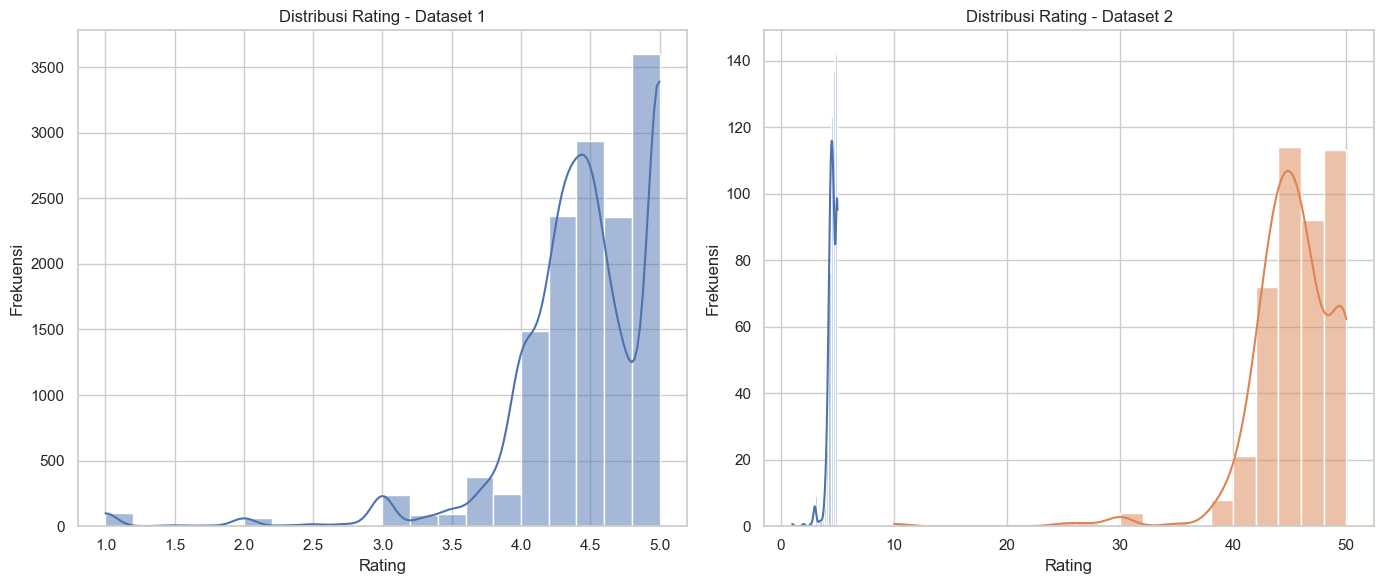

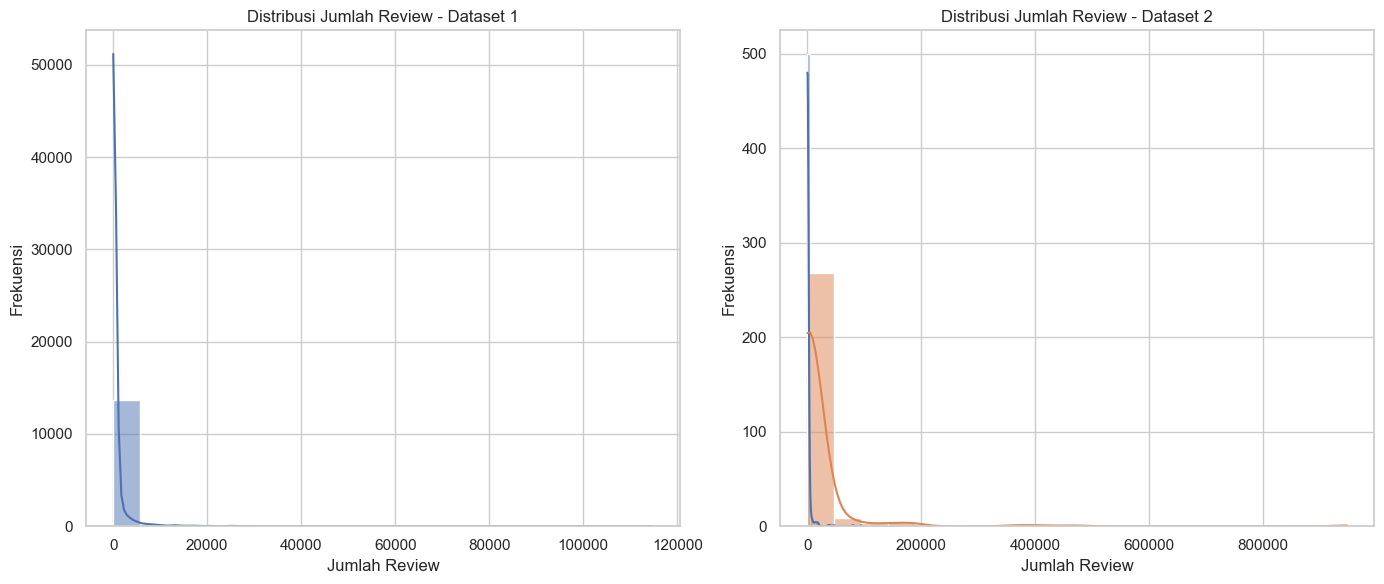

(Unnamed: 0                   0
 name                         0
 address                      0
 coordinates                  0
 workday_timing               0
 closed_on                    0
 reviews                      0
 rating                       0
 most_popular_times           0
 popular_times                0
 reviewer_name                0
 rating_review                0
 review_text                  0
 published_at_date            0
 accessibility_enabled        0
 planning_enabled             0
 children_enabled             0
 is_rating_updated        13881
 is_reviews_updated       13881
 dtype: int64,
 business_id                         0
 phone_number                      308
 name                                0
 full_address                        0
 latitude                            0
 longitude                           0
 review_count                       84
 rating                             84
 timezone                            0
 website                  

In [129]:
# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# 1. Memeriksa missing values
missing_values_dfByPlace = dfByPlace.isnull().sum()
missing_values_dfNew = dfNew.isnull().sum()
missing_values_dfNewFix = dfNewFix.isnull().sum()

# 2. Visualisasi distribusi rating
plt.figure(figsize=(14, 6))

# Dataset 1
plt.subplot(1, 2, 1)
sns.histplot(dfByPlace['rating'], bins=20, kde=True)
plt.title('Distribusi Rating - Dataset 1')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')

# Dataset 2
plt.subplot(1, 2, 2)
sns.histplot(dfNew['rating'], bins=20, kde=True)
plt.title('Distribusi Rating - Dataset 2')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')

# Dataset 3
plt.subplot(1, 2, 2)
sns.histplot(dfNewFix['rating'], bins=20, kde=True)
plt.title('Distribusi Rating - Dataset 2')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# 3. Visualisasi distribusi jumlah review
plt.figure(figsize=(14, 6))

# Dataset 1
plt.subplot(1, 2, 1)
sns.histplot(dfByPlace['reviews'], bins=20, kde=True)
plt.title('Distribusi Jumlah Review - Dataset 1')
plt.xlabel('Jumlah Review')
plt.ylabel('Frekuensi')

# Dataset 2
plt.subplot(1, 2, 2)
sns.histplot(dfNew['review_count'], bins=20, kde=True)
plt.title('Distribusi Jumlah Review - Dataset 2')
plt.xlabel('Jumlah Review')
plt.ylabel('Frekuensi')

# Dataset 3
plt.subplot(1, 2, 2)
sns.histplot(dfNewFix['review_count'], bins=20, kde=True)
plt.title('Distribusi Jumlah Review - Dataset 2')
plt.xlabel('Jumlah Review')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

missing_values_dfByPlace, missing_values_dfNew, missing_values_dfNewFix